In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import math
import pandas as pd
import seaborn as sns

In [16]:
def flatlist(l):
    return [item for sublist in l for item in sublist]

def see_correlation(x): 
    df = pd.DataFrame(x)
    corr_matrix = df.corr()
    corr_tresh = 0.5
    corr_attributes = flatlist([[(i,j) for j in range(i+1,corr_matrix.shape[0]) if abs(corr_matrix[i][j])>corr_tresh] for i in range(corr_matrix.shape[0])])
    print(corr_attributes)
    print(corr_matrix)

n_info: 1


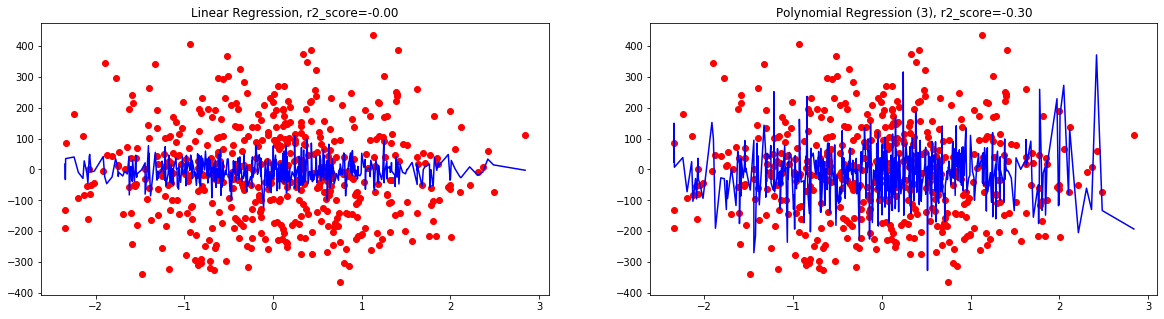

n_info: 2


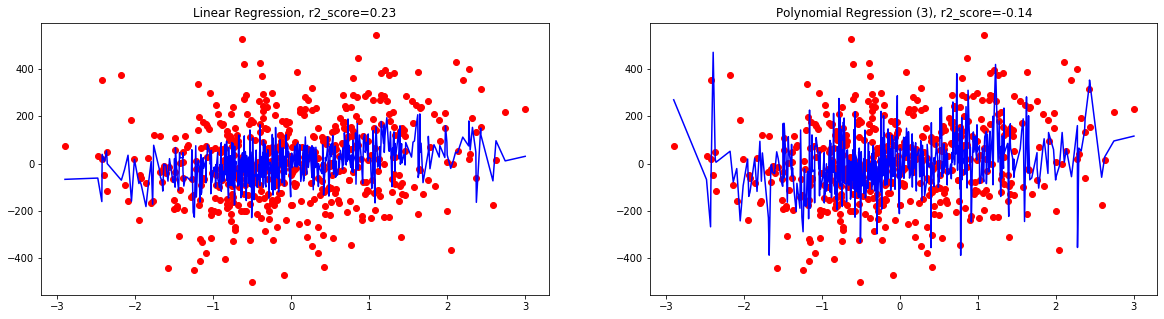

n_info: 3


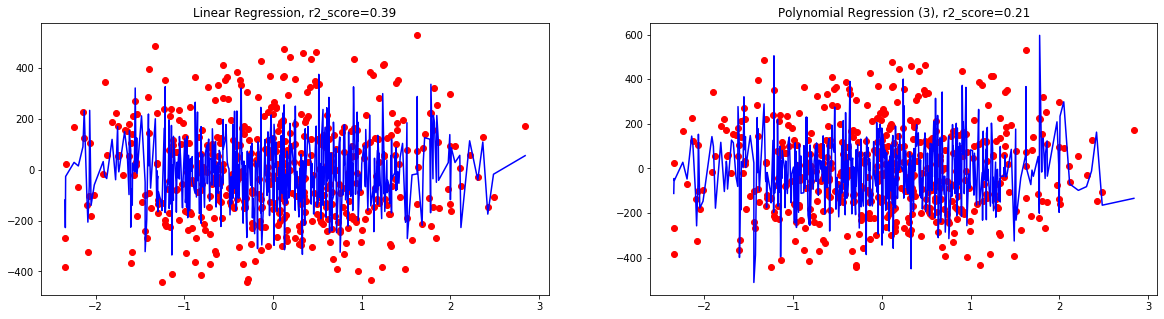

n_info: 4


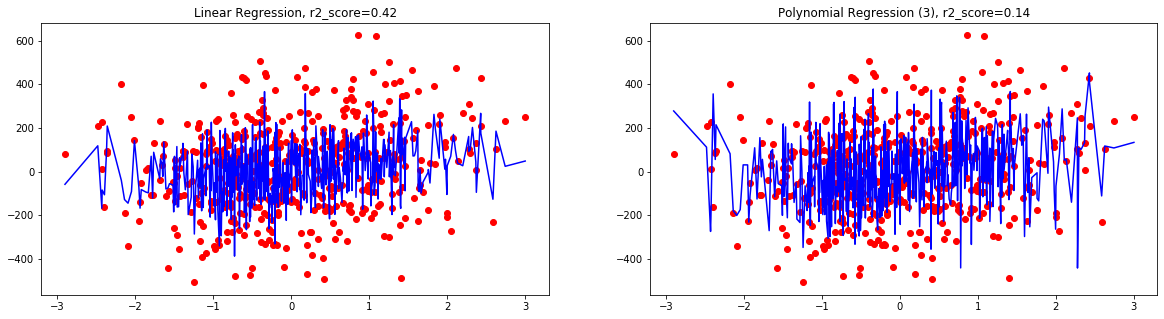

n_info: 5


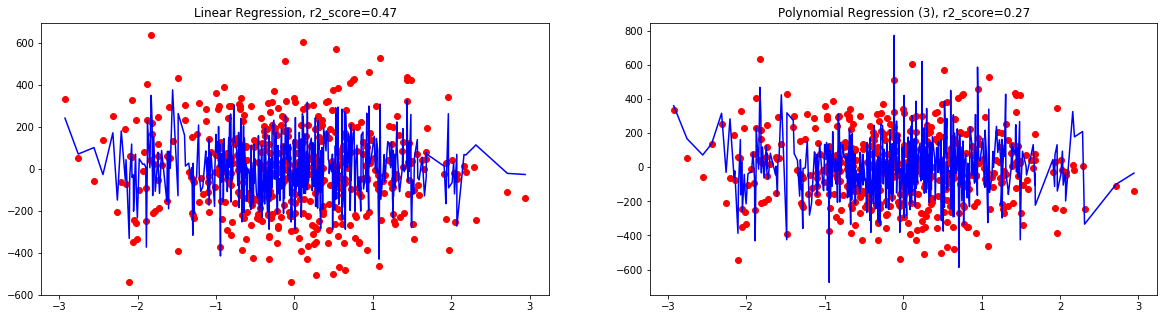

n_info: 6


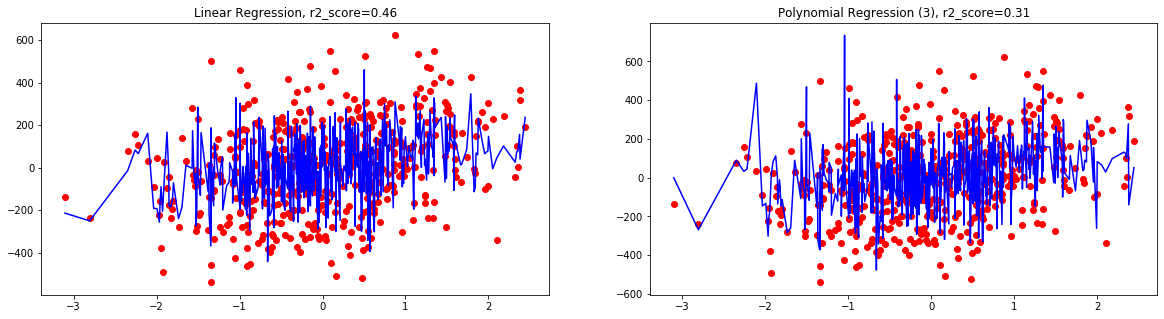

n_info: 7


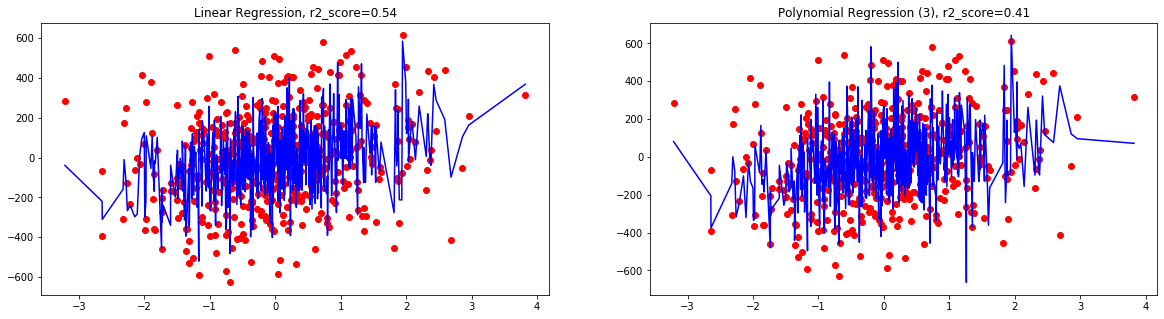

n_info: 8


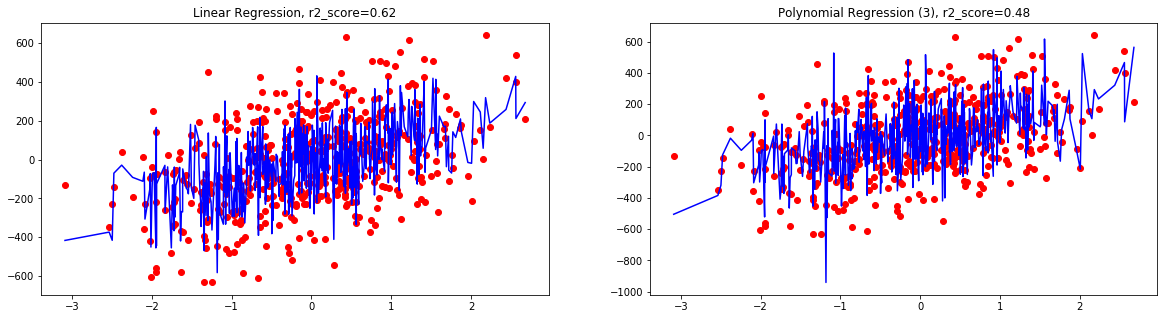

n_info: 9


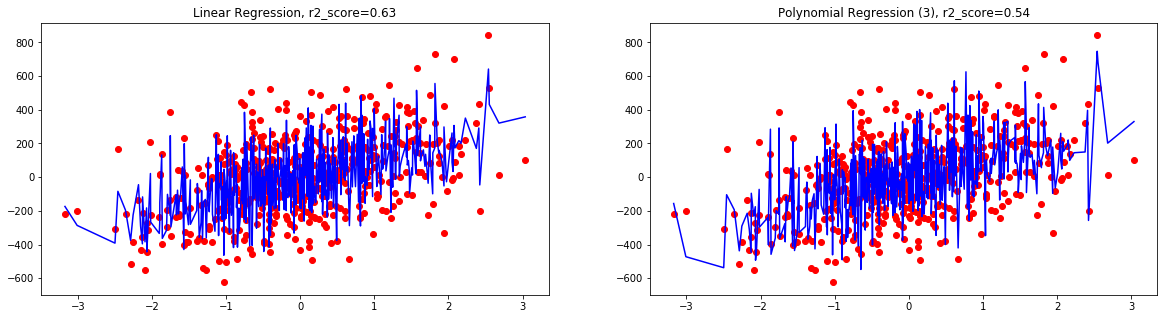

n_info: 10


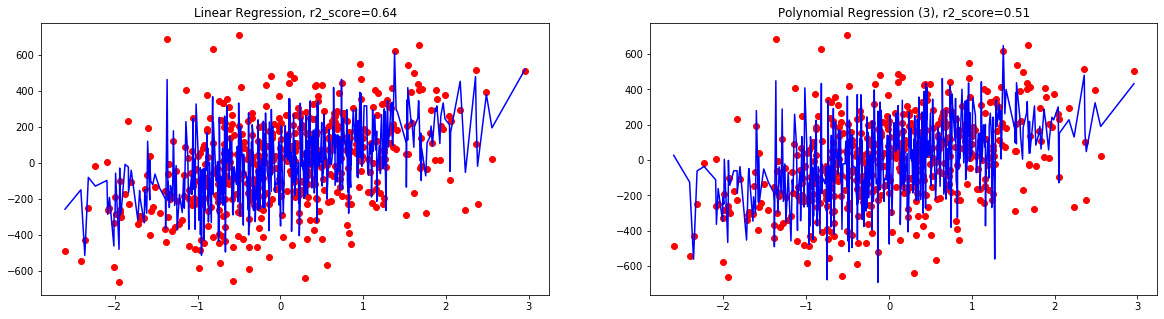

In [18]:
n_features = 10
degree = 3
regs = [LinearRegression(fit_intercept = True), make_pipeline(PolynomialFeatures(degree), LinearRegression())]
titles = ["Linear Regression", f"Polynomial Regression ({degree})"]
r2_scores_linear = []
r2_scores_poly = []

for n_info in range(1,n_features+1):
    print("n_info: " + str(n_info))
    x, y , coef = make_regression(n_samples = 2000, random_state = 43, n_features = n_features, coef=True, n_informative = n_info, noise = 150)

    fig ,ax = plt.subplots(1 ,len(regs) , figsize=(20,5))
    
    for i,reg in enumerate(regs):

        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42, shuffle=True)
        y_test = y_test[x_test[:,0].argsort()]
        x_test = x_test[x_test[:,0].argsort()]

        reg.fit(x_train, y_train)
        y_pred = reg.predict(x_test)
        score = r2_score(y_test, y_pred)
        ax[i].scatter(x_test[:,0],y_test, c ='r')
        ax[i].plot(x_test[:,0],y_pred, 'b')
        ax[i].set_title(f'{titles[i]}, r2_score={score:.2f}')
        
        if(titles[i] == "Linear Regression"):
            r2_scores_linear.append(score)
        else:
            r2_scores_poly.append(score)
        
    plt.show()

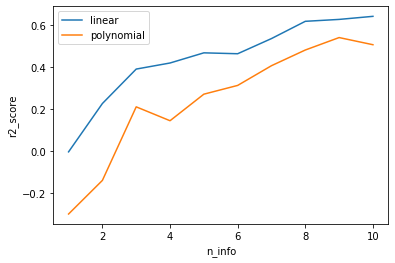

In [19]:
plt.xlabel("n_info")
plt.ylabel("r2_score")
plt.plot(list(range(1,n_features+1)), r2_scores_linear, label ='linear')
plt.plot(list(range(1,n_features+1)), r2_scores_poly, label = 'polynomial')
plt.legend()